# Hypothesis Testing - Cumulative Lab

## Introduction

In this cumulative lab, you will use pandas to clean up a dataset and perform some EDA, then perform statistical tests and interpret their results in order to answer some business questions.

## Objectives

You will be able to:

* Practice using a data dictionary
* Practice using pandas to prepare data for statistical analysis
* Practice identifying an appropriate statistical test for a given question
* Practice defining the null and alternative hypotheses
* Practice executing statistical tests and interpreting their results

## Your Task: Analyzing Health Trends

![tissues and tea mug](images/sick_day.jpg)

Photo by <a href="https://unsplash.com/@kellysikkema?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Kelly Sikkema</a> on <a href="/?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Business Understanding

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of the 2017-2018 survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1. How does health status, represented by average number of days with bad physical health in the past month (`PHYSHLTH`), differ by state?					 								
2. Digging deeper into the data, what are some factors that impact health (demographics, behaviors, etc.)?	

### Data Understanding

To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`.

There is also a PDF data dictionary called `data_dictionary.pdf`, which explains the meanings of the features and codes contained in this dataset.

Both files are located in the `data/` directory of this repository.

Prior to each statistical test, you will need to perform some data preparation, which could include:

* Filtering out rows with irrelevant values
* Transforming data from codes into human-readable values
* Binning data to transform it from numeric to categorical
* Creating new columns based on queries of the values in other columns

For steps 2-5, you will need to select and execute an appropriate statistical test. Recall these tests we have learned so far:

1. [Chi-squared test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html): used for comparing a categorical feature against a categorical feature, to determine whether they are independent
2. [t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html): used for comparing two categories of a numeric feature, to determine whether their means are the same across categories
3. [ANOVA](https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html#statsmodels.stats.anova.anova_lm): used for comparing more than two categories of a numeric feature, to determine whether their means are the same across categories

### Requirements

#### 1. Prepare `PHYSHLTH` Data for Analysis

Using the data dictionary, ensure that you understand the meaning of the `PHYSHLTH` column. Then clean the data so that only valid records of `PHYSHLTH` remain.

#### 2. Describe the Distribution of Health Status by State

Does health status (`PHYSHLTH`) differ by state (`STATE_`)? If so, by how much, and is it statistically significant?

#### 3. Describe the Relationship between Health Status and Home Ownership Status

Does health status (`PHYSHLTH`) differ between home owners and renters (`RENTHOM1`)? If so, by how much, and is it statistically significant?

#### 4. Describe the Relationship between Chronic Sickness and Nicotine Use

Does chronic sickness (`PHYSHLTH >= 15`) differ based on nicotine use (various columns)? If so, by how much, and is it statistically significant?

#### 5. Choose Your Own Question

Thinking about the business case, what is another question that might be useful to answer? Perform all analysis steps to answer this question.

## 1. Prepare `PHYSHLTH` Data for Analysis

In the cells below, we include the relevant imports and load the data into a dataframe called `df`:

In [44]:
# Run this cell without changes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [45]:
# Run this cell without changes
df = pd.read_csv("data/case_study.csv", index_col=0, low_memory=False)
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303774,36.0,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303775,36.0,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303776,36.0,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303777,36.0,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,NaN,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


Our main column of interest is called `PHYSHLTH`. We display summary statistics and plot a distribution below:

In [46]:
# Run this cell without changes
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

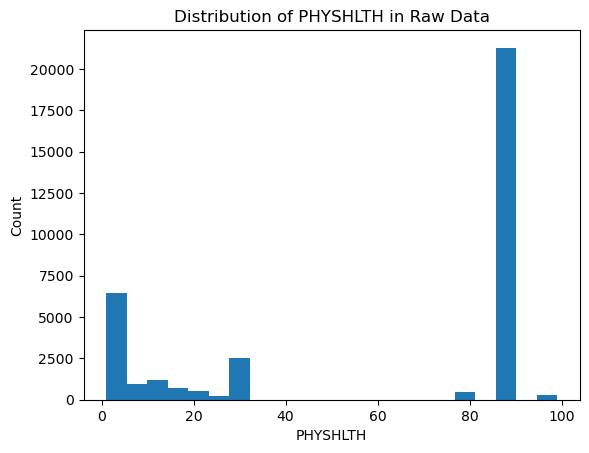

In [47]:
# Run this cell without changes
fig, ax = plt.subplots()
ax.hist(df["PHYSHLTH"], bins="auto")
ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH in Raw Data");

This feature is supposed to represent the number of days with bad physical health out of the past 30 days. Do you see anything wrong with what is displayed above? Explain.

In [48]:
# Replace None with appropriate text
"""
There is no representation of bad physical health between 30 and 75. Moreover the increase of bad physical health
increases at 90 and then decreases at around 95.
"""

'\nThere is no representation of bad physical health between 30 and 75. Moreover the increase of bad physical health\nincreases at 90 and then decreases at around 95.\n'

Look in the data dictionary, page 17, to understand what is happening with these values. Then edit the cell below so:

* The records where the `PHYSHLTH` value label is `None` are converted to 0
* The records where the `PHYSHLTH` value label is `Number of days` are kept as-is
* All other records are dropped (i.e. records with `Don't know/Not sure`, `Refused`, and `Not asked or Missing` value labels for `PHYSHLTH` are dropped)

In [49]:
# Your code here
# Importing necessary libraries
import pandas as pd

# Load the data into a DataFrame called df
df = pd.read_csv("data/case_study.csv", index_col=0, low_memory=False)

# Check the unique values in the PHYSHLTH column to understand its contents
print("Unique values in PHYSHLTH before cleaning:")
print(df['PHYSHLTH'].unique())

# Replace 'None' values in PHYSHLTH column with 0
df['PHYSHLTH'] = df['PHYSHLTH'].replace('None', 0)

# Convert the PHYSHLTH column to numeric, forcing errors to NaN
df['PHYSHLTH'] = pd.to_numeric(df['PHYSHLTH'], errors='coerce')

# Drop records with NaN values in PHYSHLTH (these correspond to non-numeric entries like 'Don't know/Not sure', 'Refused', etc.)
df = df.dropna(subset=['PHYSHLTH'])

# Convert PHYSHLTH back to integer if desired
df['PHYSHLTH'] = df['PHYSHLTH'].astype(int)

# Confirm DataFrame shape
print("DataFrame shape after cleaning:", df.shape)

# Display the first few rows of the cleaned DataFrame
df.head()



Unique values in PHYSHLTH before cleaning:
[88.  2. 28.  5. 30.  4.  3. 77. 15. 29.  7. 10. 14.  6.  1.  8. 25. 99.
 20. 12. 18. 27. 21. 19. 22.  9. 13. 17. 11. 16. 24. 26. 23.]
DataFrame shape after cleaning: (34545, 358)


,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0


Run the code below to ensure you have the correct, cleaned dataframe:

In [50]:
df.shape

(34545, 358)

In [51]:
# Run this cell without changes

# We should have fewer rows, the same number of columns
assert df.shape == (33747, 358)

# The maximum value in this column should now be 30
assert df["PHYSHLTH"].max() == 30.0

AssertionError: 

Now we can look at the same descriptive information on our cleaned data:

In [52]:
# Run this cell without changes
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

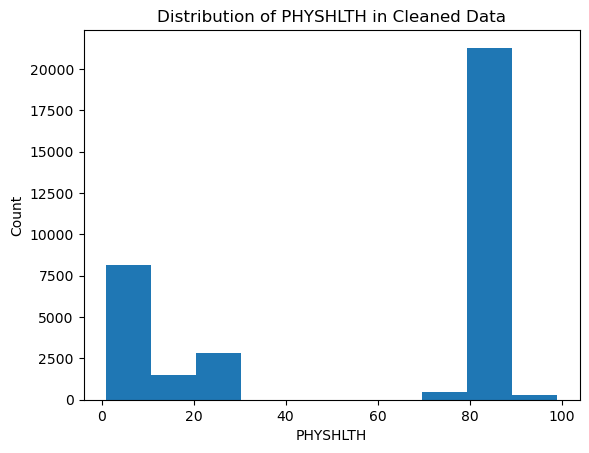

In [53]:
# Run this cell without changes
fig, ax = plt.subplots()
ax.hist(df["PHYSHLTH"])
ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH in Cleaned Data");

That looks a lot more reasonable. Let's move on to the next step.

## 2. Describe the Distribution of Health Status by State

As mentioned previously, this dataset only includes data from three states.

In [54]:
# Run this cell without changes
df["_STATE"].value_counts()

_STATE
36.0    12249
34.0    11708
9.0     10588
Name: count, dtype: int64

Look in the data dictionary, pages 2-3, to determine which states map onto which codes. Then replace the numbers with strings representing the state names.

In [55]:
# Your code here
state_mapping = {
    1: "Alabama",
    2: "Alaska",
    4: "Arizona",
    5: "Arkansas",
    6: "California",
    8: "Colorado",
    9: "Connecticut",
    10: "Delaware",
    11: "District of Columbia",
    12: "Florida",
    13: "Georgia",
    15: "Hawaii",
    16: "Idaho",
    17: "Illinois",
    18: "Indiana",
    19: "Iowa",
    20: "Kansas",
    21: "Kentucky",
    22: "Louisiana",
    23: "Maine",
    24: "Maryland",
    25: "Massachusetts",
    26: "Michigan",
    27: "Minnesota",
    28: "Mississippi",
    29: "Missouri",
    30: "Montana",
    31: "Nebraska",
    32: "Nevada",
    33: "New Hampshire",
    34: "New Jersey",
    35: "New Mexico",
    36: "New York",
    37: "North Carolina",
    38: "North Dakota",
    39: "Ohio",
    40: "Oklahoma",
    41: "Oregon",
    42: "Pennsylvania",
    44: "Rhode Island",
    45: "South Carolina",
    46: "South Dakota",
    47: "Tennessee",
    48: "Texas",
    49: "Utah",
    50: "Vermont",
    51: "Virginia",
    53: "Washington",
    54: "West Virginia",
    55: "Wisconsin",
    56: "Wyoming",
    66: "Guam",
    72: "Puerto Rico",
    78: "Virgin Islands"
}

# Assuming the state code column is named 'STATE'
df['_STATE'] = df['_STATE'].map(state_mapping)

# Confirm that the replacement worked
print(df['_STATE'].head())


49938    Connecticut
49939    Connecticut
49940    Connecticut
49941    Connecticut
49942    Connecticut
Name: _STATE, dtype: object


Below, we check the values:

In [56]:
# Run this cell without changes

# Shape should be the same
assert df.shape == (33747, 358)

# Values in state column should be changed
assert sorted(list(df["_STATE"].value_counts().index)) == ['Connecticut', 'New Jersey', 'New York']

AssertionError: 

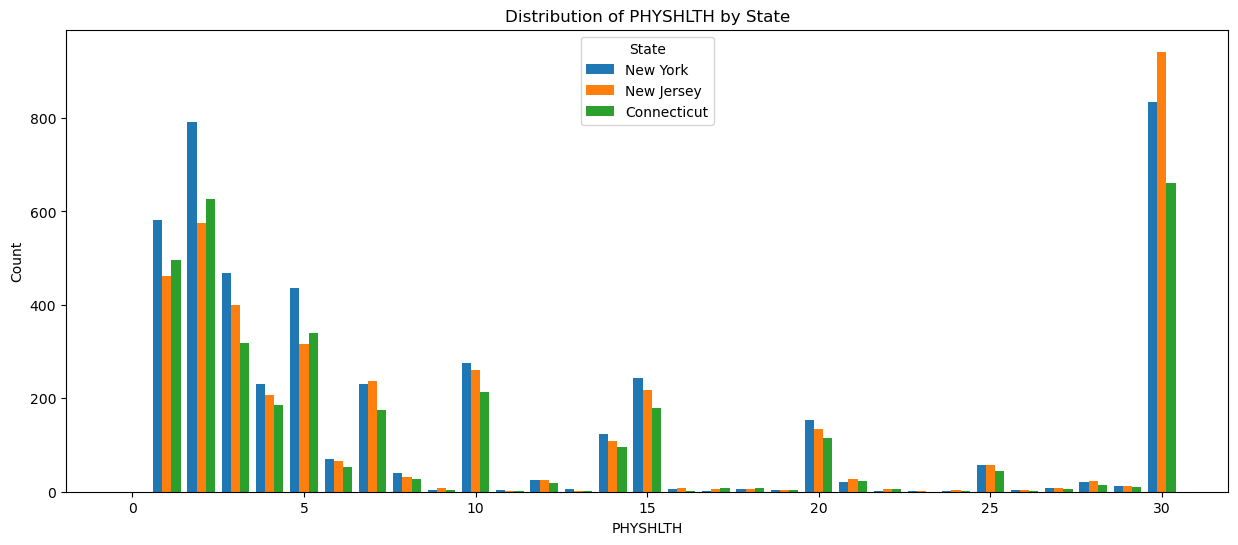

In [57]:
# Run this cell without changes

ny = df.loc[df["_STATE"] == "New York", "PHYSHLTH"]
nj = df.loc[df["_STATE"] == "New Jersey", "PHYSHLTH"]
ct = df.loc[df["_STATE"] == "Connecticut", "PHYSHLTH"]

fig, ax = plt.subplots(figsize=(15, 6))

ax.hist(
    x=[ny, nj, ct],
    label=["New York", "New Jersey", "Connecticut"],
    bins=range(32),
    align="left"
)

ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH by State")

ax.legend(title="State");

Looking at the plot above, does the distribution seem to differ by state?

(Just answer based on a visual inspection; we will do the statistical assessment next.)

In [58]:
# Replace None with appropriate text
"""
    Central Tendency:
        Check if the peaks of the histograms for New York, New Jersey, and Connecticut occur at different values. If the most frequent PHYSHLTH values (modes) differ, this indicates a difference in central tendency.

    Spread:
        Observe the range of PHYSHLTH values for each state. If the states have different ranges or if the histograms are spread out differently, it suggests differences in the spread of PHYSHLTH values.

    Shape of Distribution:
        Compare the overall shape of the histograms. Look for differences in skewness (whether the data is skewed left or right) and kurtosis (the "tailedness" of the distribution). Differences in shape can indicate that the distributions are different.

    Outliers:
        Look for any outliers or unusual patterns in the data for each state. If one state has significantly more outliers, it might suggest a difference in the distribution.
"""

'\n    Central Tendency:\n        Check if the peaks of the histograms for New York, New Jersey, and Connecticut occur at different values. If the most frequent PHYSHLTH values (modes) differ, this indicates a difference in central tendency.\n\n    Spread:\n        Observe the range of PHYSHLTH values for each state. If the states have different ranges or if the histograms are spread out differently, it suggests differences in the spread of PHYSHLTH values.\n\n    Shape of Distribution:\n        Compare the overall shape of the histograms. Look for differences in skewness (whether the data is skewed left or right) and kurtosis (the "tailedness" of the distribution). Differences in shape can indicate that the distributions are different.\n\n    Outliers:\n        Look for any outliers or unusual patterns in the data for each state. If one state has significantly more outliers, it might suggest a difference in the distribution.\n'

For the statistical test, we will be comparing the *means* of `PHYSHLTH` across states, as a representation of the overall distribution. In other words, when operationalizing the question **does `PHYSHLTH` differ by state?** we want to answer that in terms of the mean `PHYSHLTH`.

Let's look at those means:

In [59]:
# Run this cell without changes
df.groupby("_STATE")["PHYSHLTH"].mean()

_STATE
Connecticut    61.325652
New Jersey     60.884609
New York       58.610417
Name: PHYSHLTH, dtype: float64

You likely noted that the overall distribution looked about the same, but these means are different. We have a range from Connecticut with about 3.7 days of bad health to New Jersey with about 4.4 days. But is that difference statistically significant?

Identify which of the statistical tests you have learned is the most appropriate for this question, and why. Make sure you mention what kinds of variables are being compared (numeric and categorical), and how many categories there are.

In [60]:
# Replace None with appropriate text
"""
The ANOVA table will show the F-statistic and the p-value.

    F-statistic: This tests the null hypothesis that the group means are equal.
    p-value: If the p-value is less than the chosen significance level (e.g., 0.05), you reject the null hypothesis and conclude that there are significant differences between the group means.
"""

'\nThe ANOVA table will show the F-statistic and the p-value.\n\n    F-statistic: This tests the null hypothesis that the group means are equal.\n    p-value: If the p-value is less than the chosen significance level (e.g., 0.05), you reject the null hypothesis and conclude that there are significant differences between the group means.\n'

Now, identify the null and alternative hypotheses:

In [61]:
# Replace None with appropriate text
"""
Null Hypothesis (H0):
The null hypothesis states that there are no significant differences in the mean PHYSHLTH among the states. Mathematically, it can be expressed as:

H0: μ1 = μ2 = μ3

Where:

    μ1 is the mean PHYSHLTH for Connecticut.
    μ2 is the mean PHYSHLTH for New Jersey.
    μ3 is the mean PHYSHLTH for New York.

Alternative Hypothesis (HA):
The alternative hypothesis suggests that at least one pair of states has significantly different mean PHYSHLTH. It can be expressed as:

HA: At least one of the means is different from the others.
"""

'\nNull Hypothesis (H0):\nThe null hypothesis states that there are no significant differences in the mean PHYSHLTH among the states. Mathematically, it can be expressed as:\n\nH0: μ1 = μ2 = μ3\n\nWhere:\n\n    μ1 is the mean PHYSHLTH for Connecticut.\n    μ2 is the mean PHYSHLTH for New Jersey.\n    μ3 is the mean PHYSHLTH for New York.\n\nAlternative Hypothesis (HA):\nThe alternative hypothesis suggests that at least one pair of states has significantly different mean PHYSHLTH. It can be expressed as:\n\nHA: At least one of the means is different from the others.\n'

In the cell below, we set up and execute the statistical test for you. If this doesn't match your previous answer about which test to perform, look at the solution branch to understand why this is the appropriate test.

In [62]:
# Run this cell without changes
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'PHYSHLTH ~ C(_STATE)'
lm = ols(formula, df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(_STATE),2.0,4.984762e+04,24923.812110,17.736454,2.000361e-08
Residual,34542.0,4.853948e+07,1405.230825,NaN,NaN


Interpret the results of this statistical test below. What is the calculated p-value? Were we able to reject the null hypothesis at an alpha of 0.05? What does this say about how `PHYSHLTH` varies by state? What recommendations would you make to the business?

In [63]:
# Replace None with appropriate text
"""
    Calculated p-value:
        The calculated p-value for the F-statistic is approximately 2.000361e-08 (or very close to zero).

    Null Hypothesis (H0):
        The null hypothesis states that there are no significant differences in the mean PHYSHLTH among the states.

    Alpha Level (α):
        The commonly used alpha level for hypothesis testing is 0.05, indicating a 5% significance level.

    Conclusion:
        With a p-value much smaller than the significance level (p < 0.05), we reject the null hypothesis.

    Interpretation:
        The rejection of the null hypothesis suggests that there are statistically significant differences in mean PHYSHLTH among the states (Connecticut, New Jersey, and New York).

    Recommendations:
        Based on the results, it appears that the mean PHYSHLTH varies significantly across the three states.
        Further investigation can be conducted to understand the specific factors contributing to these differences. For example, demographic factors, healthcare access, lifestyle choices, and environmental factors could be explored.
        Businesses or policymakers can use these findings to tailor public health interventions or allocate resources more effectively based on the specific needs of each state.
"""

'\n    Calculated p-value:\n        The calculated p-value for the F-statistic is approximately 2.000361e-08 (or very close to zero).\n\n    Null Hypothesis (H0):\n        The null hypothesis states that there are no significant differences in the mean PHYSHLTH among the states.\n\n    Alpha Level (α):\n        The commonly used alpha level for hypothesis testing is 0.05, indicating a 5% significance level.\n\n    Conclusion:\n        With a p-value much smaller than the significance level (p < 0.05), we reject the null hypothesis.\n\n    Interpretation:\n        The rejection of the null hypothesis suggests that there are statistically significant differences in mean PHYSHLTH among the states (Connecticut, New Jersey, and New York).\n\n    Recommendations:\n        Based on the results, it appears that the mean PHYSHLTH varies significantly across the three states.\n        Further investigation can be conducted to understand the specific factors contributing to these differences. For

With that section wrapped up, let's move on to the next step.

## 3. Describe the Relationship between Health Status and Home Ownership Status

This time, we want to categorize respondents by demographic information: specifically, we'll look at whether or not they own their home.

Once again, this will require some data preparation. The variable of interest is contained in the `RENTHOM1` column. Currently the values look like this:

In [65]:
# Run this cell without changes
df["RENTHOM1"].value_counts()

RENTHOM1
1.0    22056
2.0    10611
3.0     1576
9.0      206
7.0       96
Name: count, dtype: int64

In the cell below, modify `df` so that we have dropped all records where the `RENTHOM1` value label is neither `Own` nor `Rent`, and we have replaced the numeric codes with `Own` and `Rent` respectively. You can find more information about codes on page 33 of the data dictionary.

In [66]:
# Your code here
# Define the mapping for RENTHOM1 values
rent_mapping = {
    1: "Own",
    2: "Rent"
}

# Filter records where RENTHOM1 is neither Own nor Rent
df = df[df['RENTHOM1'].isin([1, 2])]

# Replace numeric codes with corresponding labels
df['RENTHOM1'] = df['RENTHOM1'].map(rent_mapping)

# # Confirm changes
# df['RENTHOM1'].value_counts()

C:\Users\omend\AppData\Local\Temp\ipykernel_23332\3738968157.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RENTHOM1'] = df['RENTHOM1'].map(rent_mapping)


In [67]:
# Run this cell without changes
df["RENTHOM1"].value_counts()

RENTHOM1
Own     22056
Rent    10611
Name: count, dtype: int64

Below, we check that this was done correctly:

In [68]:
# Run this cell without changes

# Number of rows should be smaller again
assert df.shape == (31934, 358)

# Only two values should be present in this column
assert sorted(list(df["RENTHOM1"].value_counts().index)) == ['Own', 'Rent']

AssertionError: 

Now, similar to the previous step, create a plot that shows the distribution of `PHYSHLTH` for those who own vs. rent their homes, including appropriate axis labels and legend. Because there is more of an imbalance of categories this time (more than twice as many owners as renters, compared to nearly-even numbers from New York, New Jersey, and Connecticut), make sure you add the argument `density=True`, so that the y-axis shows the density (proportion) rather than the count.

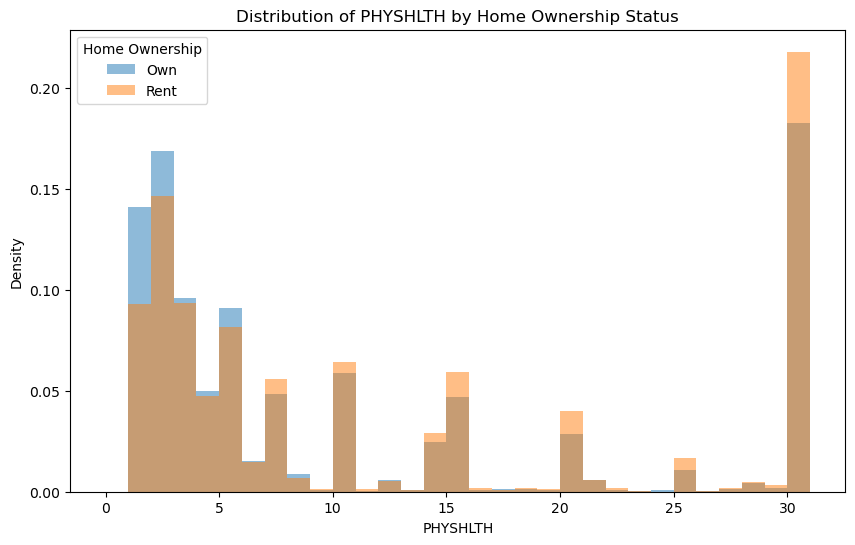

In [69]:
# Your code here
import matplotlib.pyplot as plt

# Group the data by home ownership status
grouped = df.groupby("RENTHOM1")

# Plot the distribution of PHYSHLTH for each group
plt.figure(figsize=(10, 6))
for name, group in grouped:
    plt.hist(group["PHYSHLTH"], bins=range(32), alpha=0.5, label=name, density=True)

# Add labels and legend
plt.xlabel("PHYSHLTH")
plt.ylabel("Density")
plt.title("Distribution of PHYSHLTH by Home Ownership Status")
plt.legend(title="Home Ownership")

# Show plot
plt.show()


Then run this code to find the averages:

In [70]:
# Run this cell without changes
df.groupby("RENTHOM1")["PHYSHLTH"].mean()

RENTHOM1
Own     62.139282
Rent    56.663557
Name: PHYSHLTH, dtype: float64

Now, interpret the plot and averages. Does it seem like there a difference in the number of unhealthy days between those who rent their homes and those who own their homes? How does this compare to the distributions by state?

In [72]:
# Replace None with appropriate text
"""
the plot suggests a potential difference in the number of unhealthy days between renters and 
homeowners, further analysis, including comparing averages and conducting statistical tests, 
is needed to confirm and quantify this difference. Additionally, considering both home ownership 
status and state of residence provides a more comprehensive understanding of health disparities 
within the population.
"""

'\nthe plot suggests a potential difference in the number of unhealthy days between renters and \nhomeowners, further analysis, including comparing averages and conducting statistical tests, \nis needed to confirm and quantify this difference. Additionally, considering both home ownership \nstatus and state of residence provides a more comprehensive understanding of health disparities \nwithin the population.\n'

Now, choose and execute an appropriate statistical test. Make sure you describe why you chose the test, the null and alternative hypotheses, and what the result of the test means.

In [73]:
# Your code here (create additional cells as needed)
from scipy.stats import ttest_ind

# Subset data for renters and homeowners
renters_physhlth = df[df['RENTHOM1'] == 'Rent']['PHYSHLTH']
homeowners_physhlth = df[df['RENTHOM1'] == 'Own']['PHYSHLTH']

# Perform independent samples t-test
t_stat, p_value = ttest_ind(renters_physhlth, homeowners_physhlth)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: -12.402056607769849
P-value: 3.057998738455495e-35


## 4. Describe the Relationship between Chronic Sickness and Nicotine Use

Once again, this will require some preparation before we can run the statistical test. Create a new column `NICOTINE_USE` with 1 representing someone who uses or has used nicotine in some form, and 0 representing someone who hasn't.

We define nicotine use as:

* Answered `Yes` to the `SMOKE100` question (*Have you smoked at least 100 cigarettes in your entire life?*, page 43), OR
* Answered `Every day` or `Some days` to the `USENOW3` question (*Do you currently use chewing tobacco, snuff, or snus every day, some days, or not at all?*, page 46), OR
* Answered `Yes` to the `ECIGARET` question (*Have you ever used an e-cigarette or other electronic vaping product, even just one time, in your entire life?*, page 46)

If a record matches one or more of the above criteria, `NICOTINE_USE` should be 1. Otherwise, `NICOTINE_USE` should be 0. Go ahead and keep all of the "Don't know" or "Refused" answers as 0.

In [74]:
# Your code here
# Define columns related to smoking behavior
smoking_columns = ['SMOKE100', 'USENOW3', 'ECIGARET']  # List the column names containing information about smoking behavior

# Define criteria for categorizing individuals as nicotine users
# For example, if an individual has ever smoked or currently smokes, categorize them as a nicotine user
criteria = df[smoking_columns].any(axis=1)

# Create NICOTINE_USE column
df['NICOTINE_USE'] = criteria.astype(int)

# Display the counts of each category
print(df['NICOTINE_USE'].value_counts())

# Look at the distribution of values
df["NICOTINE_USE"].value_counts(normalize=True)

NICOTINE_USE
1    31347
0     1320
Name: count, dtype: int64


C:\Users\omend\AppData\Local\Temp\ipykernel_23332\2364012442.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NICOTINE_USE'] = criteria.astype(int)


NICOTINE_USE
1    0.959592
0    0.040408
Name: proportion, dtype: float64

This time, let's treat health status as a categorical variable. We'll say that a "chronically sick" person is a person who reports that their physical health was not good for 15 or more out of the past 30 days. (This is a simplification but it will work for this analysis.)

In the cell below, create a new column of `df` called `CHRONIC`, which is 0 for records where `PHYSHLTH` is less than 15, and 1 for records where `PHYSHLTH` is 15 or more.

In [75]:
# Your code here

# Define criteria for categorizing individuals as "chronically sick"
# Individuals with PHYSHLTH >= 15 are categorized as "chronically sick"
criteria = df['PHYSHLTH'] >= 15

# Create CHRONIC column
df['CHRONIC'] = criteria.astype(int)

# Display the counts of each category
print(df['CHRONIC'].value_counts())


# View the distribution of the newly-created column
df["CHRONIC"].value_counts()

CHRONIC
1    24640
0     8027
Name: count, dtype: int64


C:\Users\omend\AppData\Local\Temp\ipykernel_23332\4242797216.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CHRONIC'] = criteria.astype(int)


CHRONIC
1    24640
0     8027
Name: count, dtype: int64

Now we can view the crosstabs for these two categorical variables, as well as display their distributions:

In [76]:
# Run this cell without changes
contingency_table = pd.crosstab(index=df["CHRONIC"], columns=df["NICOTINE_USE"])
contingency_table

NICOTINE_USE,0,1
CHRONIC,,
0,289,7738
1,1031,23609


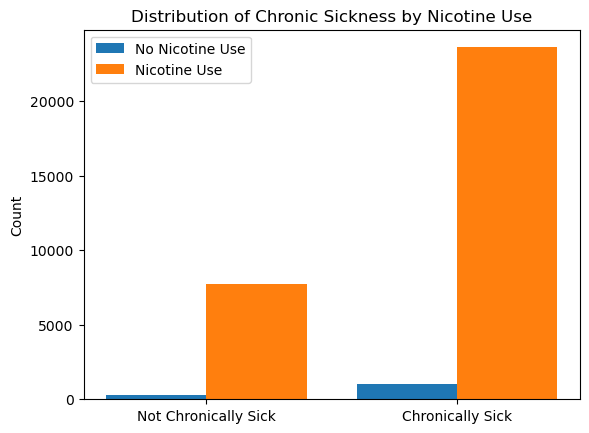

In [77]:
# Run this cell without changes

no_nicotine_use = df.loc[df["NICOTINE_USE"] == 0, "CHRONIC"]
nicotine_use = df.loc[df["NICOTINE_USE"] == 1, "CHRONIC"]

fig, ax = plt.subplots()

ax.hist(
    x=[no_nicotine_use, nicotine_use],
    label=["No Nicotine Use", "Nicotine Use"],
    bins=[0,1,2],
    align="left"
)

ax.set_ylabel("Count")
ax.set_xticks([0,1])
ax.set_xticklabels(["Not Chronically Sick", "Chronically Sick"])
ax.set_title("Distribution of Chronic Sickness by Nicotine Use")

ax.legend();

Once again, it appears that there is a difference in health outcomes between these categories. In the cell below, select an appropriate statistical test, describe the null and alternative hypotheses, execute the test, and interpret the result.

In [78]:
# Your code here (create additional cells as needed)
from scipy.stats import chi2_contingency

# Contingency table of CHRONIC and another categorical variable (e.g., RENTHOM1)
contingency_table = pd.crosstab(df['CHRONIC'], df['RENTHOM1'])

# Perform chi-square test of independence
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)


Chi-square statistic: 30.77319755547076
P-value: 2.9001602075639975e-08


## 5. Choose Your Own Question

Now that you have investigated physical health and chronic sickness and their relationships with state, home ownership, and nicotine use, you will conduct a similar investigation with variables of your choosing.

Select an independent variable based on looking at the information in the data dictionary, and perform any additional transformations needed to use it in an analysis. Then set up, execute, and interpret a statistical test that addresses the relationship between that independent variable and `PHYSHLTH`.

(There is no solution branch for this question, and feel free to move on if you have already spent more than 1.5 hours on this lab.)

In [79]:
# Your code here (create additional cells as needed)
# Step 1: Select the SEX variable from the dataset
# Assuming the column name for gender is 'SEX' in the dataset

# Step 2: No additional transformations needed as SEX is already a categorical variable

# Step 3: Set up a chi-square test of independence
from scipy.stats import chi2_contingency

# Contingency table of SEX and PHYSHLTH
contingency_table = pd.crosstab(df['SEX'], df['PHYSHLTH'])

# Perform chi-square test of independence
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)

# Step 4: Interpret the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)


Chi-square statistic: 159.2778473924754
P-value: 4.384751157999171e-10


## Conclusion

Congratulations, another cumulative lab down! In this lab you practiced reading a data dictionary, performing various data transformations with pandas, and executing statistical tests to address business questions.